# Load data

In [3]:
from IPython.display import SVG, display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import seaborn as sns

In [4]:
gene_expression = pd.read_csv(
    'CCLE__Affy_hgu133plus2_QCed_mRNA_NoDuplicates_CleanedIdentifiers_RMA-sketch_genelevel_using_jetscore.txt',
    sep=None, engine='python', header=0,
)

In [5]:
gene_expression = gene_expression.T

In [6]:
gene_expression.mean()

1          4.995906
2          4.354452
9          8.022499
10         4.414276
12         4.745138
            ...    
60674     12.136752
79133      8.673964
147660     3.825380
245972     5.521595
729348    10.887254
Length: 19635, dtype: float64

In [7]:
gene_expression.shape

(1067, 19635)

In [8]:
gene_expression

,1,2,9,10,12,13,14,15,16,18,...,10524,10938,11054,23061,54869,60674,79133,147660,245972,729348
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL,4.223429,3.674479,7.277365,4.145208,4.029598,3.433433,8.946383,3.249680,10.276116,8.101744,...,7.975829,7.666894,6.542198,7.748051,4.514262,12.642093,9.141612,3.779939,5.276707,14.115320
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL,4.384075,3.750469,6.997519,5.128134,3.978323,4.304716,8.948517,3.416038,9.622012,5.498473,...,7.875326,8.847765,7.690263,8.136758,6.141332,12.151447,8.009569,3.706794,5.516570,12.147721
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL,6.783196,3.767826,3.897323,4.133214,4.129925,3.647417,8.780586,3.735504,9.370273,3.738432,...,7.569357,7.408654,6.259688,6.868895,4.438964,11.698306,8.672440,3.814778,5.595085,12.287252
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL,4.476213,4.029830,9.350321,4.497987,4.521013,3.595288,9.101276,3.520743,9.955727,5.768418,...,7.662641,9.527644,7.908985,7.012102,4.701159,12.965402,9.406763,3.838322,6.038491,11.017916
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL,5.596887,3.794230,9.037694,4.560074,3.839451,3.591908,9.559303,3.654630,9.934966,5.939260,...,8.425545,9.359440,7.259569,7.445686,4.149302,11.995794,8.860146,3.816308,5.552706,10.789574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL,7.020229,3.604623,9.552231,3.967111,4.015805,3.493510,7.959359,3.871260,11.628972,7.348019,...,7.952288,9.907248,7.079067,7.715556,4.423841,13.222338,8.560196,3.939343,5.240587,9.847610
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL,5.981265,3.853859,8.240386,4.211769,3.921458,3.690866,9.061742,3.469436,10.899650,9.200349,...,8.204108,10.017769,8.387435,8.788594,6.402662,12.962934,7.989192,4.299388,5.433049,8.606686
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL,4.786461,5.602934,8.057336,4.185823,5.254947,3.398607,8.640023,3.380242,10.177668,8.707979,...,6.587001,7.625971,6.965988,7.898270,4.509069,12.372738,8.833618,3.677973,5.608546,10.422215
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL,5.318138,3.728012,8.798405,4.186391,4.366862,3.596459,9.206282,3.345551,11.897365,5.178586,...,7.983068,9.165479,6.779695,7.252939,4.499319,13.226825,9.336131,3.857535,5.755694,11.361798


In [7]:
Entrez_Map = pd.read_csv('Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)
Entrez_Map

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
1,653635,1,14361.00,29370.00,-1,"WASP family homolog 7, pseudogene",WASH7P,21865.50
11,79501,1,69090.00,70008.00,1,olfactory receptor family 4 subfamily F member 5,OR4F5,69549.00
128,100132287,1,490755.00,495445.00,-1,uncharacterized LOC100132287,LOC100132287,493100.00
150,729759,1,568227.00,569166.00,-1,olfactory receptor family 4 subfamily F member 29,OR4F29,568696.50
168,101928626,1,627379.00,629009.00,-1,uncharacterized LOC101928626,LOC101928626,628194.00
...,...,...,...,...,...,...,...,...
4446,474148,24,24832607.50,24837505.00,1,"testis-specific transcript, Y-linked 3B",TTTY3B,24835056.25
4447,253175,24,24833813.25,24836316.75,1,chromodomain Y-linked 1B,CDY1B,24835065.00
4448,9085,24,24833813.25,24836316.75,1,chromodomain Y-linked 1,CDY1,24835065.00
4449,114758,24,24833170.00,24836968.00,1,CSPG4 pseudogene 1 Y-linked,CSPG4P1Y,24835069.00


In [8]:
TumorType = pd.read_csv('CCLE__Sample_To_TumorType.csv',
                               sep=None, engine='python', header=0,
                       )

TumorType = TumorType.set_index('GSM_IDENTIFIER')
TumorType

,TYPE,Type2,TYPE3
GSM_IDENTIFIER,,,
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_G03_436510.CEL,Breast cancer,Breast cancer,Breast carcinoma
MAKER_p_NCLE_RNA7_HG.U133_Plus_2_C07_454622.CEL,Breast cancer,Breast cancer,Breast carcinoma
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_B03_419876.CEL,Breast cancer,Breast cancer,Breast carcinoma
CASED_p_NCLE_RNA4_HG.U133_Plus_2_C01_383628.CEL,Breast cancer,Breast cancer,Breast carcinoma
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_A08_474686.CEL,Breast cancer,Breast cancer,Breast carcinoma
...,...,...,...
CRAZY_p_NCLE_RNA10_HG.U133_Plus_2_B08_569552.CEL,Urogenital,Urogenital,Ovarian carcinoma
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E11_241158.CEL,Urogenital,Urogenital,Endometrial cancer
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_F03_419766.CEL,Urogenital,Urogenital,Endometrial cancer


# PCA

In [9]:
pca = PCA(n_components=0.9, svd_solver='full')
pca_components = pca.fit_transform(gene_expression)
pca_components.shape

(1067, 497)

In [10]:
pca = PCA(n_components=0.95, svd_solver='full')
pca_components = pca.fit_transform(gene_expression)
pca_components.shape

(1067, 696)

In [11]:
pca = PCA(n_components=0.99, svd_solver='full')
pca_components = pca.fit_transform(gene_expression)
pca_components.shape

(1067, 951)

In [12]:
pca = PCA(n_components=None, svd_solver='full')
pca_components = pca.fit_transform(gene_expression)
pca_components.shape

(1067, 1067)

In [13]:
result = pd.concat([gene_expression, TumorType], axis=1)
result.head()

,1,2,9,10,12,13,14,15,16,18,...,23061,54869,60674,79133,147660,245972,729348,TYPE,Type2,TYPE3
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL,4.223429,3.674479,7.277365,4.145208,4.029598,3.433433,8.946383,3.249680,10.276116,8.101744,...,7.748051,4.514262,12.642093,9.141612,3.779939,5.276707,14.115320,Lung,Lung,Lung small cell carcinoma
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL,4.384075,3.750469,6.997519,5.128134,3.978323,4.304716,8.948517,3.416038,9.622012,5.498473,...,8.136758,6.141332,12.151447,8.009569,3.706794,5.516570,12.147721,Gastrointestinal,Gastrointestinal,Colorectal carcinoma
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL,6.783196,3.767826,3.897323,4.133214,4.129925,3.647417,8.780586,3.735504,9.370273,3.738432,...,6.868895,4.438964,11.698306,8.672440,3.814778,5.595085,12.287252,Lung,Lung,Lung small cell carcinoma
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL,4.476213,4.029830,9.350321,4.497987,4.521013,3.595288,9.101276,3.520743,9.955727,5.768418,...,7.012102,4.701159,12.965402,9.406763,3.838322,6.038491,11.017916,Lymphoma,Lymphoma,Burkitt lymphoma
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL,5.596887,3.794230,9.037694,4.560074,3.839451,3.591908,9.559303,3.654630,9.934966,5.939260,...,7.445686,4.149302,11.995794,8.860146,3.816308,5.552706,10.789574,Lymphoma,Lymphoma,Lymphoma-other


In [14]:
colorset = {}
for i, x in enumerate(set(result['TYPE'])):
    colorset[x] = plt.get_cmap('tab20')(i)

In [15]:
colors = [colorset[x] for x in result['TYPE']]

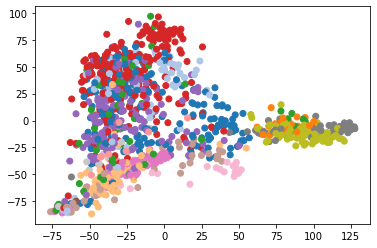

In [16]:
pca = PCA(n_components=2, svd_solver='full')
pca_components = pca.fit_transform(gene_expression)

plt.scatter(pca_components[:,0], pca_components[:,1], c=colors)
plt.show()

# ICA

In [17]:
order_genes = Entrez_Map['mapped_entrez_v1']
order_genes = [x for x in order_genes if x in gene_expression.columns]
gene_expression = gene_expression[order_genes]

In [18]:
ica = FastICA(n_components=25, random_state=42)
zscores = gene_expression / gene_expression.std(axis=0)
ica.fit(zscores)

FastICA(n_components=25, random_state=42)

In [19]:
ica.components_.shape

(25, 19612)

In [20]:
ica.components_[1]

array([ 9.26729507e-06,  2.94565378e-05,  6.60918223e-06, ...,
       -1.02926365e-05,  1.87006935e-07,  2.80143890e-06])

In [21]:
ica.mixing_.shape

(19612, 25)

In [22]:
ica.n_iter_

19

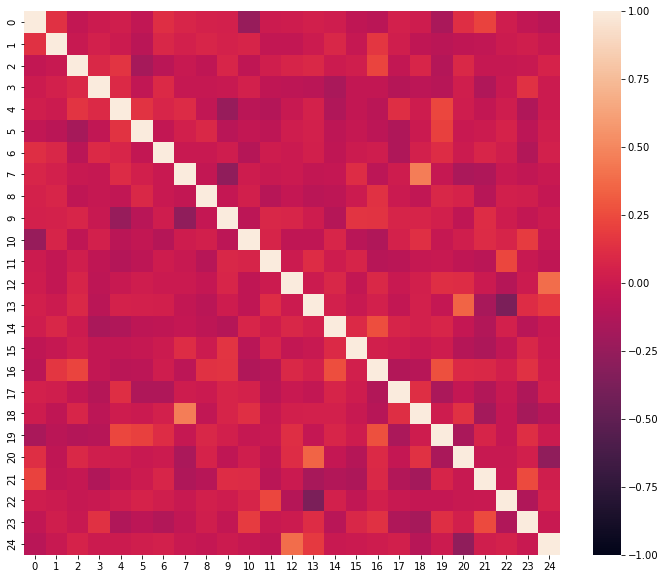

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(np.corrcoef(ica.components_),  vmin=-1, vmax=1, ax=ax)
plt.show()

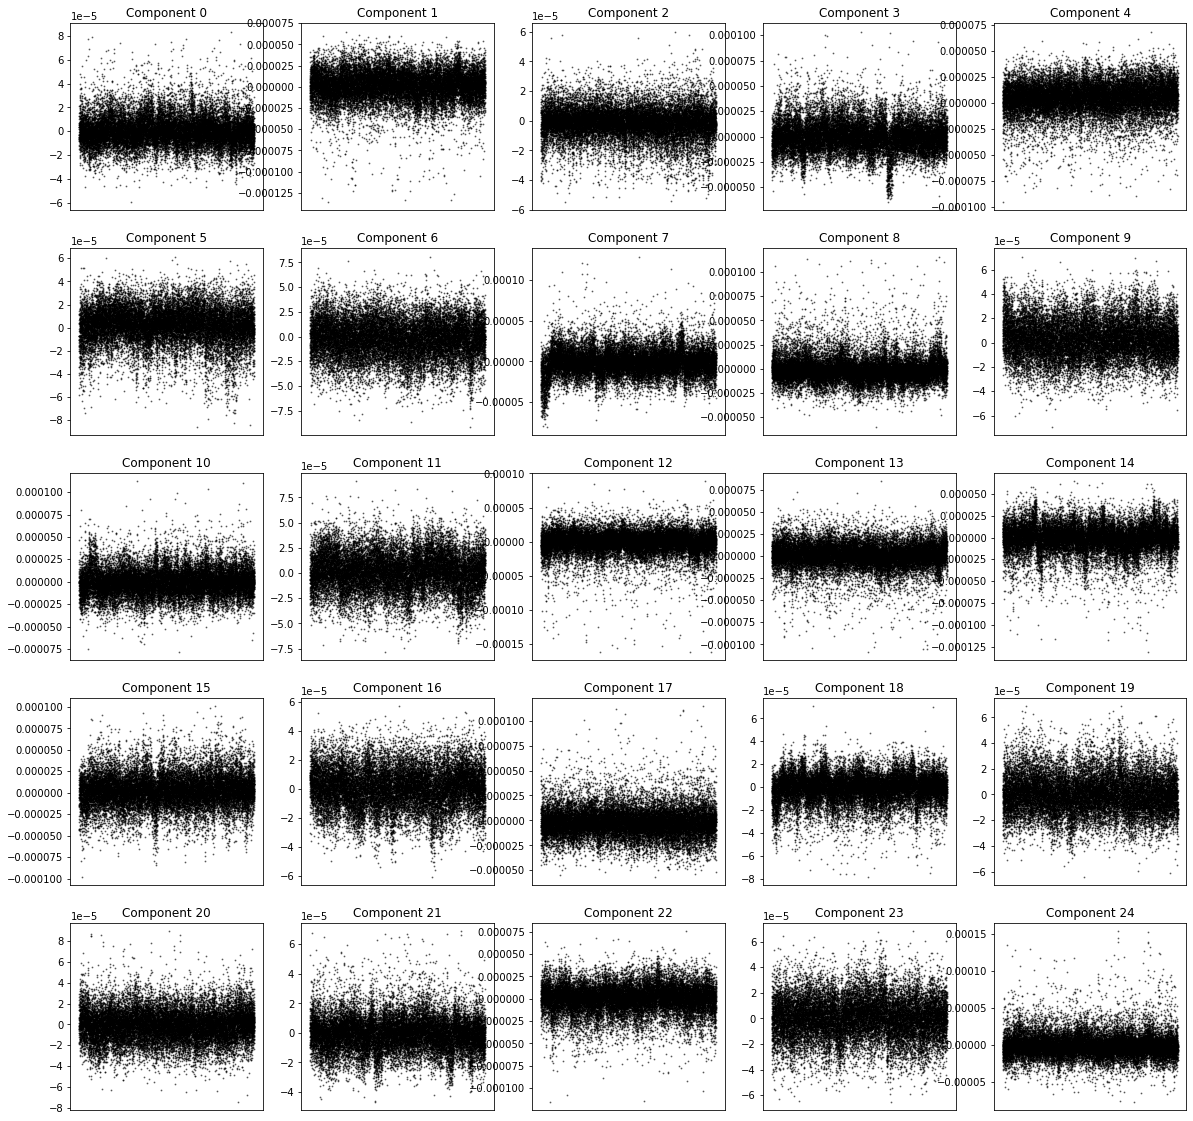

In [24]:
fig, axs = plt.subplots(5, 5, figsize=(20,20))
for i, ax in enumerate(axs.reshape(-1)):        
    ax.scatter(np.arange(0,len(ica.components_[i])),ica.components_[i], alpha=0.5, s=0.8,c='black')
    ax.axes.xaxis.set_visible(False)
    ax.grid(False)
    ax.set_title(f'Component {i}')
plt.show()

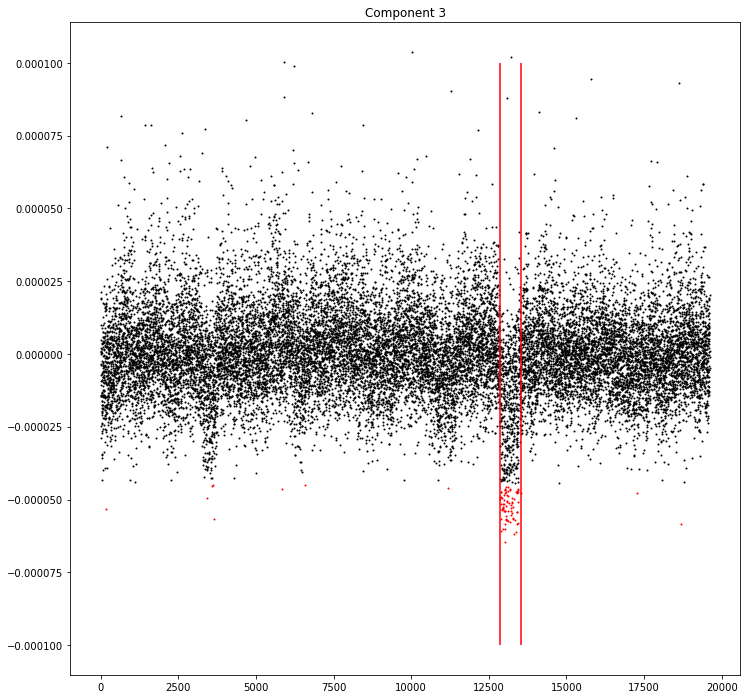

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
pos_signal = ica.components_[3].copy()
neg_signal = ica.components_[3].copy()
pos_signal[pos_signal <= -0.000045] = np.nan
neg_signal[neg_signal > -0.000045] = np.nan
ax.scatter(np.arange(0,len(neg_signal)),neg_signal, alpha=1, s=1,c='red')
ax.scatter(np.arange(0,len(pos_signal)),pos_signal, alpha=1, s=1,c='black')
ax.set_title(f'Component 3')
# Get index
correct_index = np.where(ica.components_[3] <= -0.000045)
correct_index = correct_index[0][correct_index[0] > 12000]
correct_index = correct_index[correct_index < 15000]
ax.vlines(correct_index.min(), -0.0001, 0.0001, 'red')
ax.vlines(correct_index.max(), -0.0001, 0.0001, 'red')
plt.show()

In [26]:
special_genes = np.array(order_genes)[correct_index]
printable = list((Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(special_genes)]['SYMBOL']))
print("All genes between the lines")
print ('[%s]' % ' '.join(map(str, printable)))

All genes between the lines
[PARP2 PIP4P1 SUPT16H CHD8 RAB2B METTL3 MRPL52 C14orf119 NGDN RNF31 NEDD8 TINF2 RABGGTA NOP9 SCFD1 STRN3 AP4S1 HECTD1 SRP54 BRMS1L TRAPPC6B FBXO33 KLHL28 FANCM MIS18BP1 RPS29 RPL36AL DNAAF2 KLHDC2 NEMF VCPKMT L2HGDH DMAC2L RTRAF PSMC6 CNIH1 CGRRF1 ATG14 EXOC5 KIAA0586 SIX4 MNAT1 TRMT5 PPP2R5E VTI1B SRSF5 MED6 LOC145474 COQ6 LIN52 AREL1 YLPM1 TTLL5 ANGEL1 VIPAS39 AHSA1 SNW1 GTF2A1 GALC NRDE2 PPP4R3A DDX24 SETD3 CCNK PPP2R5C WDR20 RCOR1 SNORA28 KLC1 ZBTB42 CDCA4 BRF1 PACS2 MTA1 KNL1]


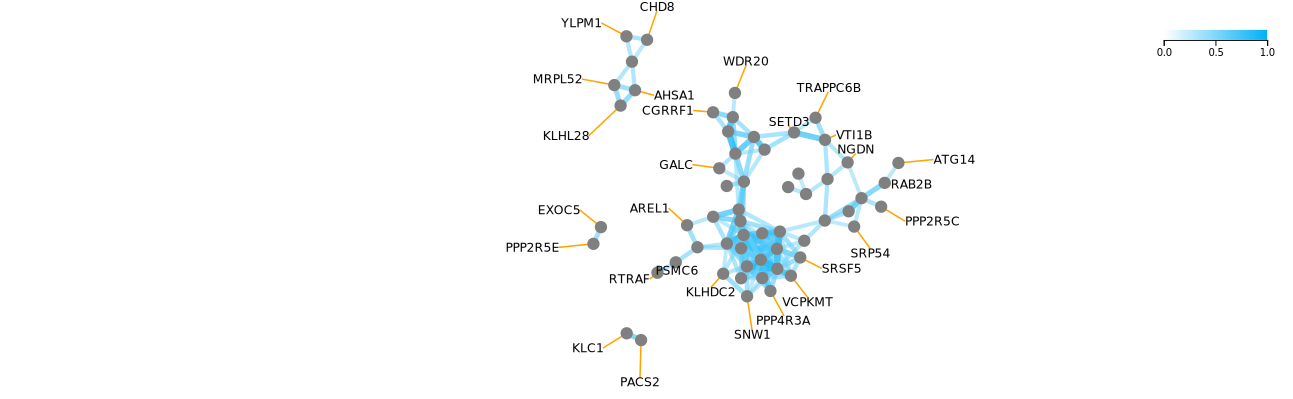

In [27]:
display(SVG(filename='visualization.svg'))

# Clustering

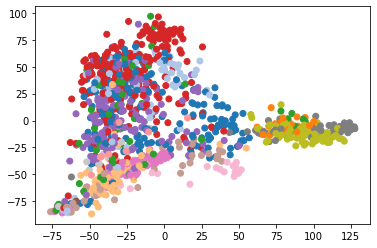

In [28]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=colors)
plt.show()

# K-means

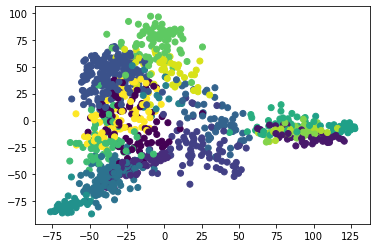

In [29]:
from sklearn.cluster import MiniBatchKMeans
OMP_NUM_THREADS=1
kmeans = MiniBatchKMeans(n_clusters=len(colorset),
                         random_state=0,
                         batch_size=2048)
kmeans.fit(gene_expression)
plt.scatter(pca_components[:,0], pca_components[:,1], c=kmeans.labels_)
plt.show()

In [30]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

# HDBSCAN

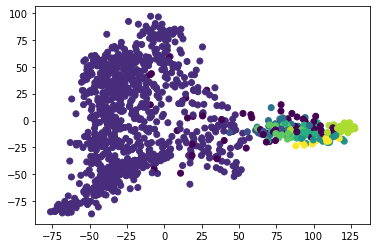

In [31]:
import hdbscan
hdbs = hdbscan.HDBSCAN()
hdbs.fit(gene_expression)
plt.scatter(pca_components[:,0], pca_components[:,1], c=hdbs.labels_)
plt.show()

In [32]:
set(hdbs.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

# SOM

# Memory error and packages works a bit weird.

# HDDA

In [22]:
pd.read_csv('HDDC.csv').set_index('Unnamed: 0')

,X[[i]]
Unnamed: 0,
1,2
2,2
3,2
4,2
5,2
...,...
1146,1
1147,1
1148,1
